# Création d'un moteur physique

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Point:
    def __init__(self, x_position, y_position, x_speed, y_speed, mass, frequency=1):
        self.x_position = x_position
        self.y_position = y_position
        self.x_speed = x_speed
        self.y_speed = y_speed
        self.frequency = frequency
        self.mass = mass

    def move(self):
        self.x_position += self.x_speed / self.frequency
        self.y_position += self.y_speed / self.frequency

    def set_x_position(self, x_position):
        self.x_position = x_position

    def set_y_position(self, y_position):
        self.y_position = y_position

    def set_x_speed(self, x_speed):
        self.x_speed = x_speed

    def set_y_speed(self, y_speed):
        self.y_speed = y_speed

In [3]:
def compute_next_step(point, x_forces=0, y_forces=0):
    point.set_x_position(point.x_position + point.x_speed / point.frequency)
    point.set_x_speed(point.x_speed + x_forces / point.frequency / point.mass)
    point.set_y_position(point.y_position + point.y_speed / point.frequency)
    point.set_y_speed(point.y_speed + y_forces / point.frequency / point.mass)
    return point

In [4]:
def generate_equilibrium():
    p = Point(0, 0, 1, 1, mass=1)
    history = []
    for i in range(100):
        p = compute_next_step(point=p)
        history.append((p.x_position, p.y_position))

    return history

In [5]:
def generate_free_fall(initial_x_speed=0, initial_y_speed=0, nb_steps=10):
    p = Point(0, 0, x_speed=initial_x_speed, y_speed=initial_y_speed, mass=1)
    history = []
    for i in range(nb_steps):
        p = compute_next_step(point=p, x_forces=-9.81)
        history.append((p.x_position, p.y_position))

    return history

In [6]:
def plot_history(history):
    history = np.array(history)
    plt.scatter(history[:, 1], history[:, 0], color='b')
    plt.show()

## Free Fall

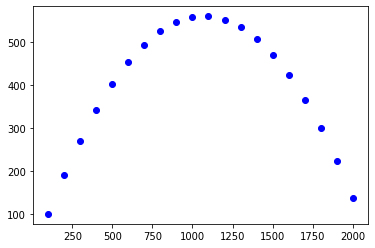

In [10]:
history = generate_free_fall(initial_x_speed=100, initial_y_speed=100, nb_steps=20)

plot_history(history)